In [ ]:
!mkdir -p~/.kaggle
!cp kaggle.json ~/ .kaggle/

mkdir: invalid option -- '~'
Try 'mkdir --help' for more information.
cp: target '.kaggle/' is not a directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten

In [ ]:
#GENERATORS

In [ ]:
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalise

In [ ]:
def process(image,label):
  image = tf.cast(image/255 ,tf.float32)
  return image,label


train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#cnn model

model= Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 88ms/step - loss: 1.7936 - accuracy: 0.6044 - val_loss: 0.5747 - val_accuracy: 0.7032
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.5535 - accuracy: 0.7109 - val_loss: 0.5078 - val_accuracy: 0.7528
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4919 - accuracy: 0.7617 - val_loss: 0.5330 - val_accuracy: 0.7298
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4308 - accuracy: 0.7992 - val_loss: 0.4567 - val_accuracy: 0.7768
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3694 - accuracy: 0.8317 - val_loss: 0.7004 - val_accuracy: 0.6152
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.3138 - accuracy: 0.8629 - val_loss: 0.4833 - val_accuracy: 0.7884
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2369 - accuracy: 0.8991 - val_loss: 0.5475 - val_accuracy:

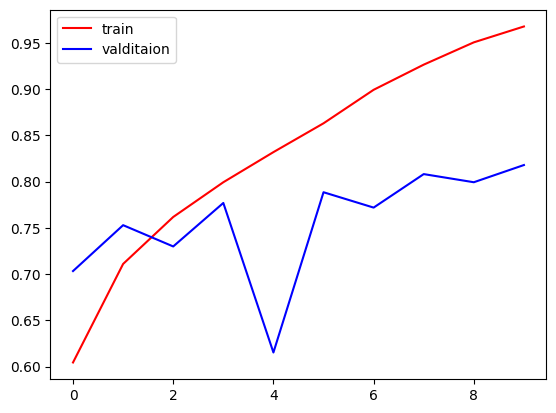

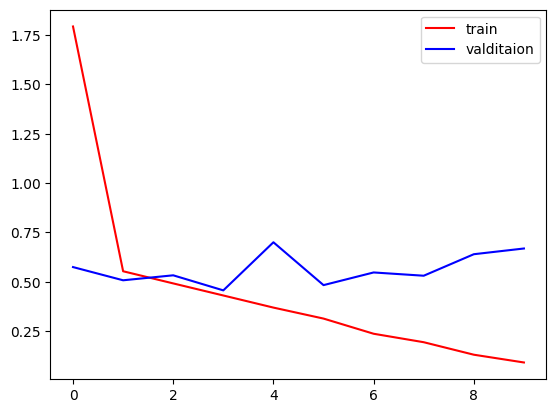

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='valditaion')
plt.legend()
plt.show()

[16]

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='valditaion')
plt.legend()
plt.show()



In [ ]:
import cv2


In [ ]:
test_img=cv2.imread('/content/dog.jpg')

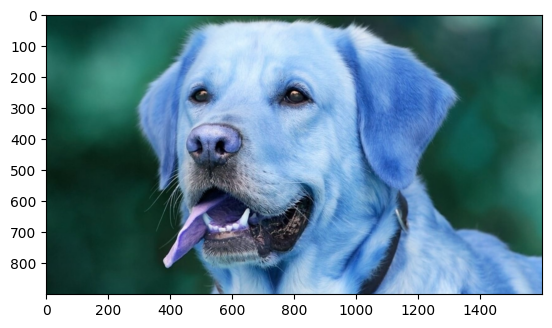

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(900, 1600, 3)

In [ ]:

test_img=cv2.resize (test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.2716071]], dtype=float32)

In [ ]:
test_img2=cv2.imread('/content/dog.jpg')

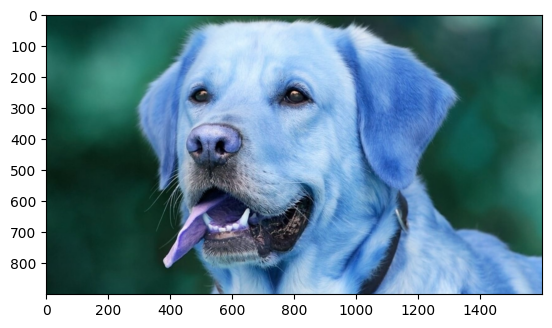

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(900, 1600, 3)

In [ ]:
test_img2=cv2.resize (test_img,(256,256))

In [ ]:
test_input2=test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 19ms/step


array([[0.40311646]], dtype=float32)